<a href="https://colab.research.google.com/github/rpizarrog/simulacion/blob/main/python%20casos/Caso_15_Variables_aleatorias_continuas_Distribuci%C3%B3n_T_Student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Distribución t Student

Existen distintas distribuciones que permiten tratar con variables aleatorias continuas

- Distribución uniforme continua
- Distribución normal
- **Distribución t student**
- Distribucuón exponencial
- Distribución chi cuadrada
- Distribución f de Fisher
- Entre otras....

La distribución t Student es utilizada para estimar medias de población cuando el tamaño de la muestra es pequeño.

Es común utilizarlas en pruebas estadísticas y análisis prueba de correlación así como pruebas de regresión.

La distribución t Student tiene las siguientes características:

- Tiene forma de montículo o campana de gauss y es simétrica alrededor de $t=0$., similar que *z*, o la distribución normal estándar.

- Es más variable que *z*
, con “colas más pesadas”.

- La forma de la distribución $t$
 depende del tamaño muestral $n$ A medida que $n$ aumenta, la variabilidad de $t$
 disminuye porque la estimación de la desviación estándar $σ$
 está basada en más información.

- Cuando $n$ sea infinitamente grande, las distribuciones $t$
 y $z$ son idénticas. (mendenhall2010?).

## Fórmula de densidad

$$
f(x) = \frac{\frac{\gamma(gl + 1)}{2}}{\sqrt(gl \cdot \pi)\cdot \gamma(gl/2)} \cdot (1 + \frac{t^2}{gl})^{\frac{-(gl+1)}{2}} \therefore
$$

o bien:

$$
f(x) = \frac{\frac{gamma(gl + 1)}{2}}{\sqrt(gl \cdot \pi)\cdot gamma(gl/2)} \cdot (1 + \frac{t^2}{gl})^{\frac{-(gl+1)}{2}} \therefore
$$


$$
\gamma = gamma
$$


En esta distribución aparece el concepto de grados de libertad:


El número de grados de libertad es igual al tamaño de la muestra $n$ (número de observaciones independientes) menos 1 $(n-1)$. [@estadística2016]

$$
gl = df = (n – 1)  \therefore  
df = \text{grados de libertad} \\
n = \text{total de elementos de la muestra de t}\\
$$

La expresión $(n-1)$ es el divisor en la fórmula para la varianza muestral $s^2 = \sum(\frac{x_i-\bar{x}}{n-1})$ se denomina número de grados de libertad **(df)** asociado con $s^2$ determina la forma de la distribución $t$. El origen del término grados de libertad es teórico y se refiere al número de desviaciones independientes elevadas al cuadrado en $s^2$ existentes para estimar $\sigma^2$.

El concepto de distribución gamma $\gamma$ es particularmente complementario a la distribución $t$ y tienen que ver con una distribución de probabilidad continua que se utiliza comúnmente en estadísticas para modelar variables que representan el tiempo hasta que ocurra un evento. La distribución gamma $\gamma$ se describirá por separado en otro de los casos.


# Objetivos

1. Generar valores aleatorios de una variable continua a través de la disribución t student.

2. Realizar una prueba de correlación mediante la distribución t student.

# Desarrollo

Existen diversas alternativas para generar números aleatorios de variables continuas en Python.

Este caso se ajsutará a utilizar la bilioteca *from scipy.stats* y la correspondiente distribución. A la distribución normal.


## Cargar librerías



In [79]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt
from scipy import stats

# from scipy.stats import uniform  # uniforme continua
# from scipy.stats import norm # normal
from scipy.stats import t # t student

# from IPython.display import display, HTML # Para html tablas ...

## Crear funciones

Sólo se utilizará la función para mostrar un hisrograma y densidad.



In [144]:
def f_visualizar_histograma_continua (datos):
  # Crear un gráfico de distribución de la variable continua
  sns.histplot(data=datos, kde=True)
  plt.xlabel(datos.columns[0])
  plt.ylabel('Frecuencia')
  plt.title('Distribución de Variable Continua')
  plt.show()

def f_visualizar_t_student(n, confianza = 0.95, t_prueba = None):
 # Crear una secuencia de valores para el gráfico
  # Tomar cualquier valor mínimo o máximo de los datos para definir límites

  # Grados de libertad
  gl = (n-2)
  x = np.linspace(-4, +4, 1000)

  # Calcular la PDF (densidad de probabilidad) de la distribución t
  pdf = t.pdf(x, df=gl)

  # Calcular los valores críticos
  # Nivel de confianza (1 - alpha)
  # confianza = 0.95
  alfa = 1 - confianza  # Para un nivel de confianza del 95%

  # Valor crítico a la izquierda
  t_critico_izq = t.ppf(alfa / 2, df=gl)

  # Valor crítico a la derecha
  t_critico_der = t.ppf(1 - alfa / 2, df=gl)
  # Crear un gráfico
  plt.figure(figsize=(10, 6))
  plt.plot(x, pdf, label=f'Distribución t de Student)')

  #print("x, t_critico_izq, t_critico_der")
  #print (x, t_critico_izq, t_critico_der)
  # Área de rechazo (5%)
  plt.fill_between(x, pdf, where=(x <= t_critico_izq) | (x >= t_critico_der), alpha=0.5, color='red', label='Área de Rechazo (5%)')

  print ("t prueba", t_prueba)
  if (t_prueba is not None):
    # Dibujar una línea punteada vertical en el valor de t de prueba
    plt.axvline(t_prueba, color='red', linestyle='dashed', linewidth=1, label='t de prueba')
  # Dibujar líneas punteadas verticales en los valores críticos
  plt.axvline(t_critico_izq, color='green', linestyle='dashed', linewidth=1, label='t crítico (+)')
  plt.axvline(t_critico_der, color='green', linestyle='dashed', linewidth=1, label='t crítico (-)')


  plt.title("Densidad t Student; Intervalo de Confianza al " + str(confianza) + "%; " +str(gl)+"gl")
  plt.xlabel("Valores t's. "+ "\n" +
           "t crítico izq:" +str(np.round(t_critico_izq, 4)) + "; " +
           "t crítico der:" +str(np.round(t_critico_der, 4)) + "; " + "\n"
           "p(x =" +str(np.round(t_critico_izq, 4))+") + p(x ="+str(np.round(t_critico_der, 4))+") =0.05")
  plt.ylabel('Densidad de Probabilidad')

  # Mostrar el gráfico
  plt.show()

## Generando numeros aletorios

Se requiere el valor de grados de libertad $gl$.

$$
gl = (n - 2)
$$

Genear $n$ números aleatorios bajo distribución t student.

El método está encapsulado en la función para generar números aleatorios es una ransformación inversa de la fórmula de densidad, al igual que la mayoría de los métodos para generar aleatrios. A partir de la fórmula de densidad.

En Python se utiliza *t.rvs()* para generar números aleatorios.


## Semilla

In [ ]:
random.seed(2023)

Se generan $n$ números aleatorios de una distribución t student con media igual a 0.

In [96]:
n = 25
gl = n-2 # Otras veces (n-1)
# Generar datos aleatorios a partir de una distribución t
numeros_aleatorios = t.rvs(df = gl, size=n)
np.round(numeros_aleatorios, 4)

array([-0.6389,  0.8373, -0.7512,  0.0758, -1.2745,  0.1637, -0.4849,
        0.2068, -0.5992, -2.0804,  0.104 ,  0.9903, -1.392 ,  0.8652,
        0.3432,  0.3934,  0.2879,  0.404 , -0.1758, -0.138 ,  0.6754,
       -0.4273, -0.092 ,  1.0031, -0.0106])

## Visualizar histograma y densidad de distribución normal

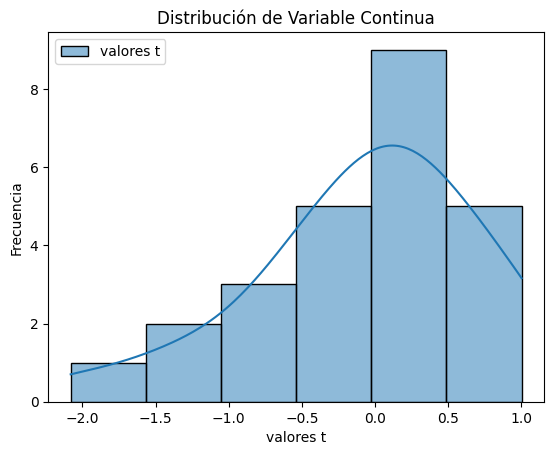

In [97]:
# Convergir los números aleatoios a un data.frame
datos = pd.DataFrame({"valores t" :numeros_aleatorios})

f_visualizar_histograma_continua (datos)

## Curva de densidad y probabilidad área bajo la curva

Se muestra sólo la densidad de la curva con los datos de los números aleatorios de $t$ student.

Se crea una secuencia de cien o mil números para simular la densidad de t student a 24 grados de libertad. $gl=24$.De esa secuencia se obtienen su densidad y se visualiza.

Se visualiza área en color rojo que representa el $5$% de los datos alrededor de $0$.

La zona blanca es zona de intervalo de confianza del $95$%.

La zona en color rojo es zona de fuera del intervalo de confianza del $95$%.


t prueba None


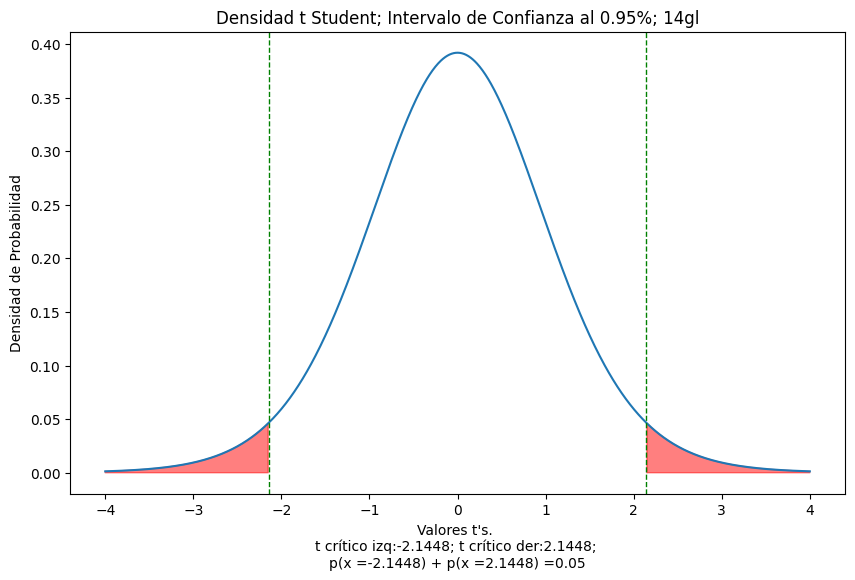

In [145]:
# Solo mandar llamar la función
f_visualizar_t_student(n=n, confianza = 0.95)


## Prueba de correlación con *t student*

El siguiente ejercico es hacer una prueba de correlción mediante la distribución *t student*

Esto serán los pasos a seguir:

- Crear un conjunto de datos con dos variables aleatorias.
- Calcular la correlación de Pearson.
- Visualizar la dispersión de los datos con el valor de correlación.
- Declarar hipótesis nula y alternativa.
- El nivel de confianza para la prueba será del 90% y se establece que la prueba será a dos colas.
- Calcular los valores de t criticos a la izquierda y a la derecha al $90\%$ de confianza.
- Calcuar el valor de *t de prueba*.
- Constastar visualmente el valor de *t de prueba* contra *valores críticos de t*.
- Tomar la decisión de si aceptar la hipótesis nula o rechazar dependiendo del valor de *t de prueba*.
- Calcular la probabilidad de *t de prueba* y constrastar contra la probabilidad de $α = (1 - 95) / 2$ a dos colas. Si el valor es menor se rechaza la $H_0$ de lo contrario se acepta.
- Verificar con el constraste.



## Crear los datos

Será un conjunto de datos que representan promedios de calificaiocnes de matemática e inglés de un estudiantes de nivel superior.


In [149]:
ingles      = [90, 95, 88, 92, 95, 90, 95, 89, 90, 95, 90, 89, 90, 98, 95, 90]
matematicas = [91, 96, 90, 93, 94, 91, 96, 90, 96, 94, 92, 90, 92, 98, 96, 92]
datos = pd.DataFrame({'ingles': ingles, 'matematicas': matematicas})
datos

,ingles,matematicas
0,90,91
1,95,96
2,88,90
3,92,93
4,95,94
5,90,91
6,95,96
7,89,90
8,90,96
9,95,94


### Correlación de Pearson

El valor de correlación de Pearson es una mediad estadística que establece la relación o asociación que existe entre dos variables numéricas.

Los valores puede ser desde $\text{-1 a 0}$ correlación negativa o de $\text{0 a +1}$ correlación positiva. Entre más cerca esté el valor de correlación de la unidad negativa o positiva la relación entre las variables es mejor.

De acuerdo a Hernández Sampiere(2014) los valores del coeficiente de correlación de Pearson se interpreta de la siguiente manera:

- -0.90 = Correlación negativa muy fuerte.
- -0.75 = Correlación negativa considerable.
- -0.50 = Correlación negativa media.
- -0.25 = Correlación negativa débil.
- -0.10 = Correlación negativa muy débil.
- 0.00 = No existe correlación alguna entre las variables.
- +0.10 = Correlación positiva muy débil.
- +0.25 = Correlación positiva débil.
- +0.50 = Correlación positiva media.
- +0.75 = Correlación positiva considerable.
- +0.90 = Correlación positiva muy fuerte.
- +1.00 = Correlación positiva perfecta (“A mayor X, mayor Y” o “a menor X, menor Y”, de manera proporcional. Cada vez que X aumenta, Y aumenta siempre una cantidad constante).

El coeficiente de correlación va desde -1 hasta +1. Los valores cercanos a -1 o a +1 corresponden a una relación lineal fuerte. Entre más cercano a cero sea el valor de la correlación, más débil es la relación lineal(Anderson, Sweeney, and Williams 2008).


In [104]:
correlacion_pearson = datos['ingles'].corr(datos['matematicas'])

print("Correlación de Pearson:", correlacion_pearson)


Correlación de Pearson: 0.8565824635453495


El valor de 0.8565 significa que es una correlación positiva de considerable a muy fuerte entre la variables de inglés y matemátcas de este conjunto de datos.

### Visualizar dispersión



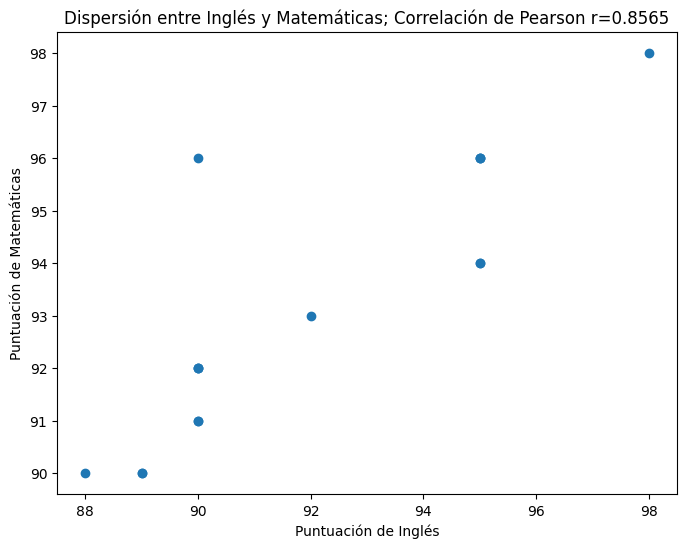

In [136]:
# Crear un gráfico de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(datos['ingles'], datos['matematicas'])
plt.title('Dispersión entre Inglés y Matemáticas; '+ "Correlación de Pearson r=0.8565")
plt.xlabel('Puntuación de Inglés')
plt.ylabel('Puntuación de Matemáticas')
#plt.grid(True)

# Mostrar el gráfico
plt.show()

# Hipótesis nula y alternativa

$$
H:0: r = 0
$$

$$
H_a: r \ne 0
$$

Mediante la distribución *t* se hace la prueba de significancia de que el valor de la correlación r de Pearson es diferente de cero.

### Calcular el estadístico de t de prueba

$$
t = \frac{r\cdot \sqrt{n-2}}{\sqrt{1 - r^2}} \therefore
$$
- $\text{r es el valor de la correlación de Pearson}$,
- $\text{(n-2) son los grados de libertad $gl$}$,



In [163]:
r = correlacion_pearson
n = len(datos)
gl = (n-2)

print("Valor de n", n)
t_prueba = (r * sqrt(n-2)) / sqrt(1 - r**2)
print ("Valor de t prueba", t_prueba)

Valor de n 16
Valor de t prueba 6.211191877702029


Determinar valores críticos de t a la izqueirda y de t a la derecha para su consraste.


Valores críticos de t izquierda y t derecha -1.7613 ;  1.7613
t prueba 6.211191877702029


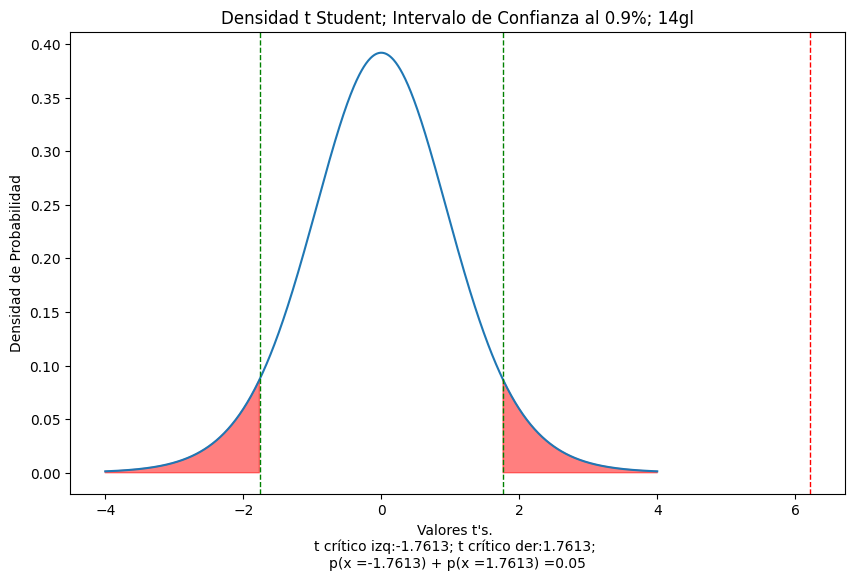

In [164]:
# Establecer el nivel de confianza (90%)
nivel_confianza = 0.90

# Calcular el valor crítico de t (dos colas)
alfa = 1 - nivel_confianza
alfa_significancia = alfa / 2

t_critico_izq = stats.t.ppf(alfa_significancia, df=n - 2)
t_critico_der = stats.t.ppf(1 - alfa_significancia, df=n - 2)

print ("Valores críticos de t izquierda y t derecha", np.round(t_critico_izq, 4), "; ", np.round(t_critico_der, 4))

f_visualizar_t_student(n= n, confianza = nivel_confianza, t_prueba=t_prueba)

Se observa que el valor de *t prueba* está muy a la derecha de zona de aceptación por lo que se rechaza la hipótesis nula $H_0$ de que el valor de correlación sea 0 y se acepta la hipótesis alternativa $H_a$ de que es diferente de cero; la interpretación tiene que ver con que el valor de la correlación si es estadísticamente significativo.

### Calcular probabilidad de *t prueba*

Se calcula la probabilida de t de prueeba y si es menor que el valor de lfa de significancia entones se rechaza $H_0$


In [168]:
import pandas as pd
from scipy import stats

# Crear el DataFrame con datos de Inglés y Matemáticas (usando el DataFrame anterior)
#datos = pd.DataFrame({'Inglés': ingles, 'Matemáticas': matematicas})

# Calcular la correlación de Pearson
correlacion, valor_p = stats.pearsonr(datos['ingles'], datos['matematicas'])

# Imprimir la correlación y el valor p
print(f"Correlación: {correlacion}")
print(f"Valor p: {valor_p:.10f}")

# Realizar la prueba de hipótesis
if valor_p < alfa_significancia:
    print("Se rechaza la hipótesis nula (H0). Existe una correlación significativa.")
else:
    print("No podemos rechazar la hipótesis nula (H0). No hay evidencia de correlación significativa.")


Correlación: 0.8565824635453494
Valor p: 0.0000227075
Se rechaza la hipótesis nula (H0). Existe una correlación significativa.


El valor de la probabilidad de *t de prueba* es muy pequeño 0.0000227075
mucho menor que el valor de alfa de 0.05 por lo que se rechaza $H_0$.




In [167]:
# Calcular la probabilidad
probabilidad = 2 * (1 - stats.t.cdf(t_prueba, df=gl))

print(f"La probabilidad asociada al valor de t de prueba es: {probabilidad:.10f}")


La probabilidad asociada al valor de t de prueba es: 0.0000227075


# Bibliografía

Bibliografía
Anderson, David R., Dennis J. Sweeney, and Thomas A. Williams. 2008. Estadística Para Administración y Economía. 10th ed. Australia • Brasil • Corea • España • Estados Unidos • Japón • México • Reino Unido • Singapur: Cengage Learning,.